In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
# from mpctools import extensions

sys.path.append('..')



In [2]:
print(sklearn.__version__)

0.21.2


# PART A: NEWSGROUPS

There are 8 news groups:
0. comp.sys.ibm.pc.hardware
1. comp.sys.mac.hardware
2. rec.autos
3. rec.motorcycles
4. sci.crypt
5. sci.electronics
6. talk.religion.misc, and
7. soc.religion.christian

# Question 1: Exploratory Analysis

In [3]:
# Training Data
training_data_location = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_train.csv')
training_data = pd.read_csv(training_data_location, delimiter=',', compression='bz2')

# Test Data
test_data_location = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')
test_data = pd.read_csv(test_data_location, delimiter=',', compression='bz2')

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5648 entries, 0 to 5647
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 43.1 MB


In [5]:
training_data.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,...,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
mean,0.001708,0.001472,0.006335,0.002273,0.002466,0.004041,0.002923,0.001420,0.002057,0.001560,...,0.003717,0.004887,0.003494,0.002800,0.006421,0.001851,0.006020,0.008144,0.006705,3.345255
std,0.034360,0.016554,0.033866,0.026688,0.022362,0.030053,0.024208,0.018515,0.020301,0.020248,...,0.028373,0.033153,0.027797,0.025441,0.037083,0.020132,0.036011,0.037727,0.039841,2.208888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.956585,0.443807,0.565277,0.711480,0.529982,0.635985,0.560049,0.461537,0.657318,0.631932,...,0.614346,0.698880,0.511068,0.596214,0.751603,0.561412,0.617048,0.438414,0.736056,7.000000


In [6]:
training_data.head(10)

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
6,0.0,0.0,0.0,0.0,0.000000,0.186521,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.182272,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 14.4 MB


In [8]:
test_data.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449,3.345194
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570,2.208286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114,7.000000


In [9]:
test_data.head(10)

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.223984,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,0.0,0.0,0.0,0.0,0.065361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.058623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
traincount = 0
for key, item in training_data.groupby(['class']):
    print(key, len(item))
    traincount += len(item)
print(traincount)

0 737
1 722
2 742
3 747
4 743
5 738
6 748
7 471
5648


In [11]:
testcount = 0
for key, item in test_data.groupby(['class']):
    print(key, len(item))
    testcount += len(item)
print(testcount)

0 245
1 241
2 248
3 249
4 248
5 246
6 249
7 157
1883


## Questions

**a. [5 points] Focusing first on the training set, summarise the key features/observations in the data: focus on the dimensionality, data ranges, feature and class distribution and report anything out of the ordinary. What are the typical values of the features like?**

The training set has 5866 entries, which means it has 5866 different documents, with 1001 unique words (key features). It also has 8 different class labels representing each news group. After grouping the data into their respective classes, I found out that out of all the newsgroups, class 7 (`soc.religion.christian`) has significantly fewer data compared to the other classes. All of the other classes have more than 700 values, but class 7 has lesser than 500. By examining the mean and standard deviation of each word, I could see that the words have similar low TF-IDF values.

**b. [3 points] Looking now at the Testing set, how does it compare with the Training Set (in terms of sizes and feature-distributions) and what could be the repurcussions of this?**

The testing set has 1883 documents and 1001 unique words (similar to the training set). This means that the training set and the testing set are split 75% - 25%. This split is good because it does not overfit the model. I can see that there is a similar trend in the testing set with regards to the significantly lesser amount of data for class 7. All of the other classes have above 240 values and class 7 only has 157. Out of curiosity, I checked the percentage of class 7 in the training set and the test set and they were both 8.34%. This is not really a problem in the test set, however it might be in the training set because it's never a good idea to train with lesser data for a certain class. 

In [12]:
print(str(471*100/5648))
print(str(157*100/1883))

8.339235127478753
8.337758895379713


**c. [2 points] Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature?**

TF-IDF (short for Term Frequency-Inverse Document Frequency) weights is a statistical measure to evaluate how important a word is to a document in a collection. The importance of a word is directly proportional to the word frequency in the document, but it is offset by the frequency of the word in the entire collection.

It is useful to consider TF-IDF as opposed to just the word frequency in the document because it helps eliminate 'unimportant' words that are used frequently from the feature vectors by setting their weight close to 0, such as stop words. It also helps avoid irrelevant and costly compuations.

# Question 2: (24 points) Unsupervised Learning

**2.1. [2 points] The K-Means algorithm is non-deterministic. Explain why this is, and how the final model is selected in the SKLearn implementation of KMeans.**

Non-deterministic means that running the algorithm several times on the same data, could give different results (test points classified differently in each iteration). This is due to the algorithm's random selection of data points as initial cluster centres. In the SKLearn implementation of KMeans, we do not explicitly select the initial cluster centres - instead, the model will select them for us. This will speed up the convergence of the algorithm.

**2.2. [1 point] One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why?**

A reasonable number of clusters would be 8, because there are 8 news groups and we want to classify which words typically belong to a group.

**[2.3] (5 points) We will use the Adjusted Mutual Information (AMI) i.e. adjusted_mutual_info_score between the clusters and the true (known) labels to quantify the performance of the clustering. Give an expression for the MI in terms of entropy. In short, describe what the MI measures about two variables, why this is applicable here and why it might be difficult to use in practice. Hint: MI is sometimes referred to as Information Gain: note that you are asked only about the standard way we defined MI and not the AMI which is adjusted for the size of the domain and for chance agreement.**

The formula for Mutual Information (MI) in terms of entropy is the following:

\begin{equation} 
\text{MI}(U,V)= \sum_{i=1}^{|U|} \sum_{i=1}^{|V|} P(i,j)  \log{P(i,j)\over{P(i)P(j)}}
\end{equation}

where P(i,j) is the probability that an object picked at random falls into both classes Ui and Vj and is defined as: 

\begin{equation} 
P(i,j) = {|U_i \cap V_j| \over{N}}
\end{equation}

Mutual Information is a measure which tells us the reduction in uncertainty (decrease of entropy) about one random variable given knowledge of another. Unlike correlation, Mutual Information calculates the statistical dependence between the two variables.

In this case, since words are not independent, knowing one of them can give us more information about the next word (like how a the word 'the' is usually followed by a noun). 

In practice (for feature selection), we would like to maximise the mutual information between the subset of selected features and target variable, however maximising it is infeasible because the set of possible combinations of features grows exponentially.

**2.4. [4 points] Fit K-Means objects with n_clusters ranging from 2 to 12. Set the random seed to 1000 and the number of initialisations to 50, but leave all other values at default. For each fit compute the adjusted mutual information (there is an SKLearn function for that). Set average_method=`max' . Plot the AMI scores against the number of clusters (as a line plot).**

In [51]:
X = training_data.drop('class', axis=1)
y = training_data['class'].values

print(y)

[3 2 1 ... 5 2 3]


In [14]:
# for i in range(2,3):
#     kmeans = KMeans(n_clusters=i, random_state=1000, n_init=50)
#     kmeans.fit(X)
#     adjusted_mutual_info_score(y, kmeans.labels_)

In [15]:
kmeans = KMeans(n_clusters=2, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_, average_method='max')

0.09833132888683942

In [16]:
kmeans = KMeans(n_clusters=3, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_)

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.19754027411318142

In [17]:
kmeans = KMeans(n_clusters=4, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_)

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.2564638316247759

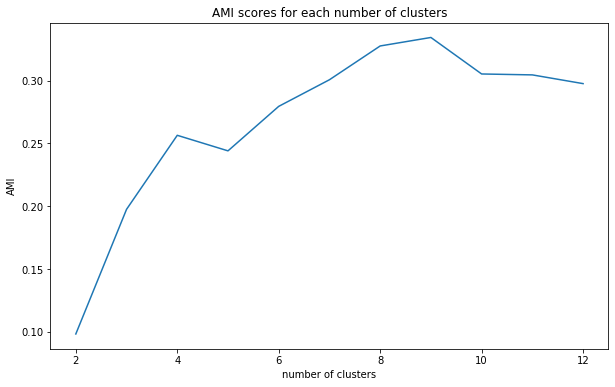

In [40]:
no_clusters = [2,3,4,5,6,7,8,9,10,11,12]
amis = []

for i in no_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1000, n_init=50)
    kmeans.fit(X)
    ami = adjusted_mutual_info_score(y, kmeans.labels_, average_method='max')
    amis.append(ami)

# Plot a graph
plt.figure(figsize=(10,6))
plt.axes()
plt.plot(no_clusters, amis)
plt.title("AMI scores for each number of clusters")
plt.xlabel("number of clusters")
plt.ylabel("AMI");

In [28]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

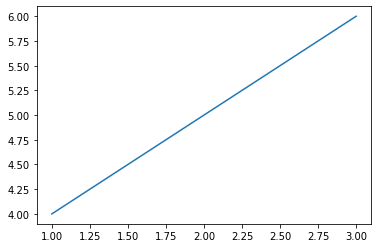

In [29]:
plt.plot([1,2,3],[4,5,6])

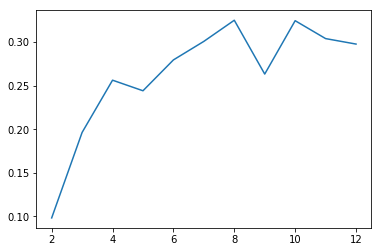

In [22]:
fig = plt.figure()
ax = plt.axes()
a = [0.09833132888683942,
0.19631405776174354,
0.25620733090585357,
0.2440905472039343,
0.27944383003358997,
0.30069857238308845,
0.32492151949761094,
0.2632306743098964,
0.3244013254498837,
0.3038880068206468,
0.2976031041980303,
]

i = [2,3,4,5,6,7,8,9,10,11,12]

ax.plot(i, a)

**2.5. [3 points] Discuss any trends and interesting aspects which emerge from the plot. Does this follow from your expectations?**

Since there are 8 newsgroups, I expected that the AMI score will be the highest when there are 8 clusters. However, the plot shows that the AMI score is the highest when there are 9 clusters. This might be because there are some ambiguous words that falls in more than 1 cluster and these ambiguous words are clustered together into a separate cluster, keeping the 8 other clusters containing only words that fall into that specific cluster.

**2.6. [6 points] Let us investigate the case with four (4) clusters in some more detail. Using seaborn's countplot function, plot a bar-chart of the number of data-points with a particular class (encoded by colour) assigned to each cluster centre (encoded by position on the plot's x-axis). As part of the cluster labels, include the total umber of data-points assigned to that cluster.**

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


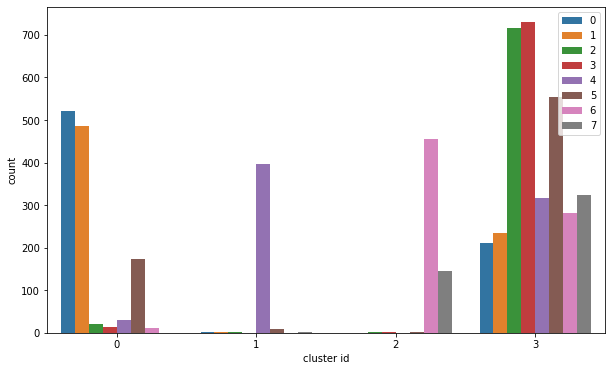

In [52]:
kmeans = KMeans(n_clusters=4, random_state=1000, n_init=50)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.labels_)

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
plt.xlabel('cluster id')
plt.show()

**2.7. [3 points] How does the clustering in Question2:(f) align with the true class labels? Does it conform to your observations in Q 2(e)?**

There are 4 bigger subgroups that you can generalise from the 8 newsgroups 
1. electronics (class 0, 1 and 5)
2. automotive (class 2 and 3)
3. religion (class 6 and 7)
3. cryptography (class 4)

and they were the biggest data points for each of the 4 clusters.

The clustering has worked well and the labels are indicative of the difference in the data, since each cluster has dominant labels that correlate to the subgroups.

## Question 3: (26 points) Logistic Regression Classification

We will now try out supervised classification on this data. We will focus on Logistic Regression and measure performance in terms of the F1 score (familiarise yourself with this score which is related to the precision and recall scores that we learnt about in class).

In most cases, we will need to validate hyper-parameters: to this end, we will use K-Fold cross validation. Using the provided SKLearn implementation for StratifiedKFold, create a 10-Fold stratified split of the data. Make sure to set the random state to 0 for reproducibility, and turn on shuffling. We will use the same splits provided by this throughout this question.

**3.1. [3 points] What is the F1-score, and why is it preferable to accuracy in our problem?
How does the macro-average work to extend the score to multi-class classification?**

The F1-score is defined as follows:
\begin{equation} 
\ {2 \times \text{precision} \times \text{recall}}\over{\text{precision} + \text{recall}}
\end{equation}

It conveys the balance between the precision and the recall. It is more preferable to use accuracy in our porblem because false positives and false negatives have similar cost and we have relatively even classes.

To calculate the classifier's overall F1-score combine the per-class F1-scores into a single number. The simplest way to do that is to is to compute an arithmetic mean of the per-class F1-scpres, called the macro-average.

**3.2. [2 points] As always we start with a simple baseline classifier. Define such a classifier (indicating why you chose it) and report its performance on the Test set. Use the `macro'
average for the f1_score.**

Predict the same class for every data point - the class with the highest prior probability. This should give minimum 20% accuracy, and possibly considerably better if one class occurs significantly more often than the others.

In [53]:
# TEST SET - test_data


y_test_baseline = test_data['class']
_, items_per_class = np.unique(y_test_baseline, return_counts=True)
class_with_most_items = np.max(items_per_class)
baseline_accuracy = class_with_most_items.astype('float') / len(y_test_baseline)

baseline_accuracy

0.13223579394583113

In [54]:
f1ss = []
for i in range(0,8):
    baseline_prediction = [i]*1883
    f1s = f1_score(test_data['class'],baseline_prediction,average='macro')
    f1ss.append(f1s)
    print('F1 score for i=' + str(i) + ' is ' + str(f1s))
print(max(f1ss))

F1 score for i=0 is 0.028782894736842105
F1 score for i=1 is 0.028366290018832393
F1 score for i=2 is 0.02909432191459409
F1 score for i=3 is 0.029197936210131333
F1 score for i=4 is 0.02909432191459409
F1 score for i=5 is 0.028886801315171445
F1 score for i=6 is 0.029197936210131333
F1 score for i=7 is 0.019240196078431374
0.029197936210131333


/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
f1_score(y_test_baseline, [2]*1883, average='macro')

0.02909432191459409

A suitable baseline classifier is to predict the same class for every data point. For this, I picked the class that has the highest F1-score, 0.0291979, which belongs to class 6.

**3.3. [3 points] We will now train a LogisticRegression Classifier from SKLearn. By referring to the documentation, explain how the Logistic Regression model can be applied to classify multi-class labels as in our case. Hint: Limit your explanation to methods we
discussed in the lectures.**

Multiclass classification with logistic regression can be done either through the one-vs-rest scheme in which for each class a binary classification problem of data belonging or not to that class is done, or changing the loss function to cross entropy loss.

TODO!!!

**3.4. [4 points] Train a Logistic Regressor on the training data. Set solver='lbfgs', multi_class='multinomial' and random_state=0. Use the Cross-Validation object you created and report the average validation-set F1-score as well as the standard deviation.
Comment on the result.**

In [55]:
lr = LogisticRegression(solver='lbfgs', 
                        multi_class='multinomial', 
                        random_state=0)

In [56]:
X_train = training_data.drop('class', axis = 1).values
y_train = training_data['class']

In [57]:
#logisticRegressor.fit(X_train, y_train)

In [58]:
skfold = StratifiedKFold(n_splits=10)
datasplit = skfold.split(X_train, y_train)
f1scores = []

for trn_idx, tst_idx in datasplit:

    X_trn, X_tst = X_train[trn_idx], X_train[tst_idx]
    y_trn, y_tst = y_train[trn_idx], y_train[tst_idx]
    
    lr.fit(X_trn, y_trn)
    y_pred = lr.predict(X_tst)
    f1 = f1_score(y_tst, y_pred, average='macro')
    std = y_pred.std()
    f1scores.append(f1)
    
    print("F1-score is: {}".format(f1))
    print("Standard deviation is: {}".format(std))
    #f1_score(y_tst, y_pred, average='macro')

print("======================================")
print("Average f1 score is " + str(sum(f1scores)/len(f1scores)))

F1-score is: 0.6625495496128986
Standard deviation is: 2.134835443282763
F1-score is: 0.6804918899173111
Standard deviation is: 2.0545216449687045
F1-score is: 0.6815497804608959
Standard deviation is: 2.118289090776395
F1-score is: 0.6425966123149198
Standard deviation is: 2.1549761016285855
F1-score is: 0.685255241774714
Standard deviation is: 2.0979088895436004
F1-score is: 0.6942403363745525
Standard deviation is: 2.140068205865807
F1-score is: 0.6667317607628829
Standard deviation is: 2.1692819829158676
F1-score is: 0.6569984934920572
Standard deviation is: 2.141263620051749
F1-score is: 0.6582862150524074
Standard deviation is: 2.1473693936241536
F1-score is: 0.6510492803037036
Standard deviation is: 2.116099532381271
Average f1 score is 0.6679749160066344


The logistic regression classifier performs significantly better than the baseline classifier. 

After calculating the f1 score for each split, the overall average f1 score for the logistic regression classifier is much higher than the baseline classifier at 0.66797 compared to 0.02909 respectively.

TODO

[3.5] (5 points) We will now optimise the Regularisation parameter C using cross-validation.
Train a logistic regressor for dierent values of C : in each case, evaluate the F1 score on
the training and validation portion of the fold. That is, for each value of C you must
provide the training set and validation-set scores per fold and then compute (and store)
the average of both over all folds. Finally plot the (average) training and validation-set
scores as a function of C . Hint: Use a logarithmic scale for C , spanning 19 samples
between 10 −4 to 10 5 .

In [59]:
logs = np.logspace(start=-4, stop=5, num=19, base=10)
logs

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05])

In [60]:
f1_avg = []

for c in logs:
    
    lrc = LogisticRegression(multi_class='multinomial',
                             solver='lbfgs',
                             random_state=0,
                             C=float(c))
    sum = 0
    
    for trn_idx, tst_idx in skfold.split(X_train, y_train):
    
        X_trn, X_tst = X_train[trn_idx], X_train[tst_idx]
        y_trn, y_tst = y_train[trn_idx], y_train[tst_idx]   
        
        lrc.fit(X_trn, y_trn)
        y_pred_c = lrc.predict(X_tst)
        sum = sum + f1_score(y_tst, y_pred_c, average='micro')
        
    f1_avg.append(sum/10)

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/env

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/env

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/athiyadeviyani/miniconda3/env

In [61]:
max = max(f1_avg)
f1_avg.index(max)

7

In [62]:
logs[7]

0.31622776601683794

(-20, 20)

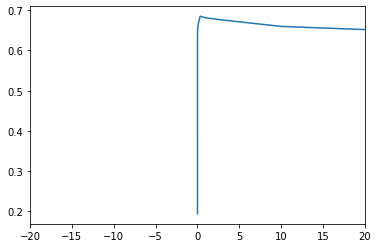

In [63]:
ax = sns.lineplot(x=logs, y=f1_avg)
plt.plot()
plt.xlim(-20, 20)

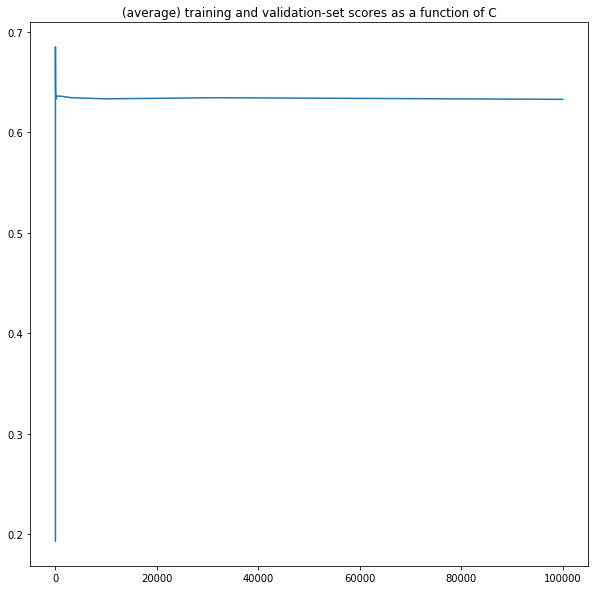

In [76]:
plt.figure(figsize=(10,10))
ax = sns.lineplot(x=logs, y=f1_avg).set_title(
    '(average) training and validation-set scores as a function of C')

[3.6] (7 points) What is the optimal value of C (and the corresponding score)? How did
you choose this value? By making reference to the eect of the regularisation parameter
C on the optimisation, explain what is happening in your plot from Question 3:(e) Hint:
Refer to the documentation for C in the LogisticRegression page on SKLearn .

TODO: ANSWER

[3.7] (2 points) Finally, report the score of the best model on the test-set, after retraining
on the entire training set (that is drop the folds). Hint: You may need to set max_iter
= 200 . Comment briey on the result.

TODO: COMMENT

In [59]:
X_test = test_data.drop('class', axis=1)
y_test = test_data['class']

In [275]:
lr_test = LogisticRegression(multi_class='multinomial',
                            solver='lbfgs',
                            random_state=0,
                            C=0.31622776601683794,
                            max_iter=200)

In [276]:
lr_test.fit(X_train, y_train)
y_pred_test = lr_test.predict(X_test)

f1_test = f1_score(y_test, y_pred_test, average='macro')

print("F1-score is: {}".format(f1_test))

F1-score is: 0.6649874691737969


# PART B: BRISTOL AIR-QUALITY [90 POINTS]

Load the dataset BristolAir_Exploratory.csv into a pandas dataframe. Again, you
should use pandas.read_csv() with the compression ag `bz2': remember also that the
rst line is the header.

## Question 4 : (30 Points) Exploratory Analysis

In [26]:
# Load the dataset
bristol_loc = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_Exploratory.csv')
bristol_exp = pd.read_csv(bristol_loc, delimiter=',', compression='bz2')

In [27]:
bristol_exp

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.000000,28.000000,28.750000,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.500000,32.000000,32.500000,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.000000,97.750000,68.000000,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.800000,39.520000,44.520000,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.780000,31.940000,54.670000,8,51.489993,-2.688779
5,2007-03-28 07:00:00+00:00,410.500000,49.500000,218.250000,1,51.441747,-2.559956
6,2007-03-28 08:00:00+00:00,295.480000,53.350000,157.870000,8,51.489993,-2.688779
7,2007-03-28 12:00:00+00:00,129.750000,39.500000,45.500000,1,51.441747,-2.559956
8,2007-03-28 13:00:00+00:00,162.860000,69.530000,60.850000,8,51.489993,-2.688779
9,2007-03-28 13:00:00+00:00,217.750000,86.000000,86.250000,10,51.460674,-2.582253


In [28]:
bristol_exp.describe()

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
count,1.191220e+06,1.188426e+06,1.197536e+06,1.306758e+06,1.306758e+06,1.306758e+06
mean,1.200819e+02,4.493445e+01,4.956930e+01,8.411554e+00,5.145213e+01,-2.580516e+00
std,1.428863e+02,3.183197e+01,7.645375e+01,5.329009e+00,1.607845e-02,2.738316e-02
min,-3.108000e+01,-6.669844e+00,-1.771000e+01,0.000000e+00,5.142786e+01,-2.688779e+00
25%,3.550000e+01,2.200000e+01,7.000000e+00,4.000000e+00,5.144175e+01,-2.592724e+00
50%,7.300000e+01,3.800000e+01,2.200000e+01,7.000000e+00,5.145543e+01,-2.582253e+00
75%,1.450000e+02,5.950000e+01,5.700000e+01,1.400000e+01,5.146067e+01,-2.562714e+00
max,2.164250e+03,5.765000e+02,1.231250e+03,1.700000e+01,5.148999e+01,-2.535230e+00


In [29]:
bristol_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306758 entries, 0 to 1306757
Data columns (total 7 columns):
Date Time    1306758 non-null object
NOx          1191220 non-null float64
NO2          1188426 non-null float64
NO           1197536 non-null float64
SiteID       1306758 non-null int64
Loc.Lat      1306758 non-null float64
Loc.Long     1306758 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.8+ MB


In [30]:
bristol_exp.ndim

2

In [31]:
bristol_exp.shape

(1306758, 7)

In [32]:
bristol_exp.size

9147306

In [33]:
bristol_exp['SiteID'].nunique()

18

In [37]:
for key, item in bristol_exp.groupby(['SiteID']):
    print("SITE NUMBER: " + str(key))
    print("NUMBER OF ITEMS: " + str(len(item)))

SITE NUMBER: 0
NUMBER OF ITEMS: 6446
SITE NUMBER: 1
NUMBER OF ITEMS: 163111
SITE NUMBER: 2
NUMBER OF ITEMS: 62990
SITE NUMBER: 3
NUMBER OF ITEMS: 25464
SITE NUMBER: 4
NUMBER OF ITEMS: 74787
SITE NUMBER: 5
NUMBER OF ITEMS: 113952
SITE NUMBER: 6
NUMBER OF ITEMS: 142141
SITE NUMBER: 7
NUMBER OF ITEMS: 115162
SITE NUMBER: 8
NUMBER OF ITEMS: 43824
SITE NUMBER: 9
NUMBER OF ITEMS: 22071
SITE NUMBER: 10
NUMBER OF ITEMS: 96407
SITE NUMBER: 11
NUMBER OF ITEMS: 20693
SITE NUMBER: 12
NUMBER OF ITEMS: 45240
SITE NUMBER: 13
NUMBER OF ITEMS: 12423
SITE NUMBER: 14
NUMBER OF ITEMS: 113951
SITE NUMBER: 15
NUMBER OF ITEMS: 2712
SITE NUMBER: 16
NUMBER OF ITEMS: 154331
SITE NUMBER: 17
NUMBER OF ITEMS: 91053


**[4.1] (6 points) Summarise the key features/observations in the data: describe the purpose
of each column and report (briefly) also on the dimensionality/ranges (ballpark figures
only, and how they compare across features) and number of sites, and identify anything
out of the ordinary/problematic: i.e. look out for missing data and negative values. Why
are the latter unreasonable in such a dataset? Hint: Refer to the documentation for how
to interpret the pollutant values.**

The first column of the data is the date of when the data was recorded. The next three columns are the three different pollutants being measured - NOx, NO2 and NO. The next column is the SiteID of site where the pollutant was recorded. The last two columnns are the longitudes and latitudes of each respective site. After briefly looking at the data, I could see that there are some samples that are either empty or have a value below 0 (negative). There are 18 unique sites in total that are being studied. Grouping the data into their respective SiteIDs, I noticed that there are significantly lesser values for site 15 than all the other sites, with only 2712 values, followed by site 0 with 6446. This is very few compared to sites 1, 5, 6, 7, 14, 16, which has more than 100000 values. All the other sites range between 10000 and 100000. This unbalanced split of values for each site might cause us to draw assumptions or conclusions that are not actually true due to the lack of data and we might overgeneralise. For the pollutants, NOx has the highest mean, followed by NO and NO2.


TODO: ADD DIMENSIONS

**[4.2] (6 points) Repeat the same analysis but this time on a per-site basis. Provide a table with the number of samples and percentage of problematic samples (negative and missing) in each site: i.e. for each issue, count the number of samples having that issue in at least one of the columns. Hint: Pandas has a handy method, to_latex() , for generating a latex table from a dataframe.**

In [132]:
total = 0
for key, item in bristol_exp.groupby(['SiteID']):
    first = bristol_exp.groupby(['SiteID']).get_group(key).isnull().any(axis=1) # missing
    second = (bristol_exp.groupby(['SiteID']).get_group(key).iloc[:,1:4] <= 0).all(1) # negative
    boolean_list = first | second 
    problematic_samples = boolean_list.value_counts()[1]
    total += problematic_samples
    total_samples = len(boolean_list)
    percentage_problematic = problematic_samples * 100 / total_samples
    print('Problematic samples for site ' + str(key) + ' is: ' + str(problematic_samples))
    print('Total number of samples for site ' + str(key) + ' is: ' + str(total_samples))
    print('Percentage of problematic samples for site ' + str(key) 
          + ' is: ' + str(percentage_problematic) + "%")
    print("====================================================")

print("====================================================")
print("====================================================")

print("====================================================")

print(total)



Problematic samples for site 0 is: 104
Total number of samples for site 0 is: 6446
Percentage of problematic samples for site 0 is: 1.6134036611852312%
Problematic samples for site 1 is: 10262
Total number of samples for site 1 is: 163111
Percentage of problematic samples for site 1 is: 6.29142117944222%
Problematic samples for site 2 is: 2740
Total number of samples for site 2 is: 62990
Percentage of problematic samples for site 2 is: 4.349896809017304%
Problematic samples for site 3 is: 19761
Total number of samples for site 3 is: 25464
Percentage of problematic samples for site 3 is: 77.60367577756833%
Problematic samples for site 4 is: 1547
Total number of samples for site 4 is: 74787
Percentage of problematic samples for site 4 is: 2.0685413240269033%
Problematic samples for site 5 is: 10066
Total number of samples for site 5 is: 113952
Percentage of problematic samples for site 5 is: 8.83354394832912%
Problematic samples for site 6 is: 10581
Total number of samples for site 6 is:

In [129]:
total = 0
for key, item in bristol_exp.groupby(['SiteID']):
    first = bristol_exp.groupby(['SiteID']).get_group(key).isnull().any(axis=1) # missing
    second = (bristol_exp.groupby(['SiteID']).get_group(1).iloc[:,1:4] <= 0).all(1) # negative
    first_total = first.value_counts()[1]
    second_total = second.value_counts()[1]
    problematic_samples = first_total + second_total
    total += problematic_samples
    total_samples = len(bristol_exp.groupby(['SiteID']).get_group(key))
    percentage_problematic = problematic_samples * 100 / total_samples
    print('Problematic samples for site ' + str(key) + ' is: ' + str(problematic_samples))
    print('Total number of samples for site ' + str(key) + ' is: ' + str(total_samples))
    print('Percentage of problematic samples for site ' + str(key) 
          + ' is: ' + str(percentage_problematic) + "%")
    print("====================================================")

print("====================================================")
print("====================================================")

print("====================================================")

print(total)




Problematic samples for site 0 is: 106
Total number of samples for site 0 is: 6446
Percentage of problematic samples for site 0 is: 1.6444306546695626%
Problematic samples for site 1 is: 10262
Total number of samples for site 1 is: 163111
Percentage of problematic samples for site 1 is: 6.29142117944222%
Problematic samples for site 2 is: 2741
Total number of samples for site 2 is: 62990
Percentage of problematic samples for site 2 is: 4.351484362597238%
Problematic samples for site 3 is: 19694
Total number of samples for site 3 is: 25464
Percentage of problematic samples for site 3 is: 77.34055922086083%
Problematic samples for site 4 is: 1549
Total number of samples for site 4 is: 74787
Percentage of problematic samples for site 4 is: 2.0712155855964274%
Problematic samples for site 5 is: 10062
Total number of samples for site 5 is: 113952
Percentage of problematic samples for site 5 is: 8.830033698399326%
Problematic samples for site 6 is: 10583
Total number of samples for site 6 is

In [130]:
bristol_exp.groupby(['SiteID']).get_group(1).isnull().any(axis=1).value_counts()[1]

10260

In [131]:
(bristol_exp.groupby(['SiteID']).get_group(1).iloc[:,1:4] <= 0).all(1).value_counts()[1]

2

In [83]:
for key, item in bristol_exp.groupby(['SiteID']):
    missing = bristol_exp.groupby(['SiteID']).get_group(key).isnull().any(axis=1) # missing
    negative = (bristol_exp.groupby(['SiteID']).get_group(key).iloc[:,1:4] <= 0).all(1) # negative
    
    boolean_list = missing | negative
    problematic_samples = boolean_list.value_counts()[1]
    total_samples = len(boolean_list)
    percentage_problematic = problematic_samples * 100 / total_samples
    
    missing_count = len(missing)
    negative_count = len(negative)
    
    missing_percentage = missing_count * 100 / total_samples
    negative_percentage = negative_count * 100 / total_samples
    
    
    print('Missing samples for site ' + str(key) + ' is: ' + str(missing_count))
    print('Negative samples for site ' + str(key) + ' is: ' + str(negative_count))
    print('Problematic samples for site ' + str(key) + ' is: ' + str(problematic_samples))
    print('Total number of samples for site ' + str(key) + ' is: ' + str(total_samples))
    print('Percentage of missing samples for site ' + str(key) 
          + ' is: ' + str(missing_percentage) + "%")
    print('Percentage of negative samples for site ' + str(key) 
          + ' is: ' + str(negative_percentage) + "%")
    print('Percentage of problematic samples for site ' + str(key) 
          + ' is: ' + str(percentage_problematic) + "%")
    print("====================================================")

Missing samples for site 0 is: 6446
Negative samples for site 0 is: 6446
Problematic samples for site 0 is: 104
Total number of samples for site 0 is: 6446
Percentage of missing samples for site 0 is: 100.0%
Percentage of negative samples for site 0 is: 100.0%
Percentage of problematic samples for site 0 is: 1.6134036611852312%
Missing samples for site 1 is: 163111
Negative samples for site 1 is: 163111
Problematic samples for site 1 is: 10260
Total number of samples for site 1 is: 163111
Percentage of missing samples for site 1 is: 100.0%
Percentage of negative samples for site 1 is: 100.0%
Percentage of problematic samples for site 1 is: 6.290195020568815%
Missing samples for site 2 is: 62990
Negative samples for site 2 is: 62990
Problematic samples for site 2 is: 2739
Total number of samples for site 2 is: 62990
Percentage of missing samples for site 2 is: 100.0%
Percentage of negative samples for site 2 is: 100.0%
Percentage of problematic samples for site 2 is: 4.348309255437371%


In [281]:
bristol_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306758 entries, 0 to 1306757
Data columns (total 7 columns):
Date Time    1306758 non-null object
NOx          1191220 non-null float64
NO2          1188426 non-null float64
NO           1197536 non-null float64
SiteID       1306758 non-null int64
Loc.Lat      1306758 non-null float64
Loc.Long     1306758 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.8+ MB


**[4.3] (4 points) Briefly summarise how the sites compare in terms of number of samples
and amount of problematic samples.**

Site 3 and 15 have the highest problematic values percentage compared to the other sites, followed by site 13, site 8, and site 12 which have a percentage higher than 10%. Every other site has a problematic sample percentage of less than 10%.

TODO: MAYBE EXPLAIN MORE

**[4.4] (3 points) Given that the columns are all oxides of nitrogen and hence we expect them
to be related, we will now look at correlations in our data. This will also be useful in
determining how well we can predict any one of the readings from the other two. Remove
the data from sites 3 and 15 and compute the Pearson correlation coefficient between
each of the three pollutant columns on the remaining data. Visualise the coefficients
between each pair of columns in a table.**

In [78]:
clean_bristol_exp = bristol_exp[bristol_exp['SiteID'] != 3 & 15]
clean_bristol_exp.dropna(inplace = True)
clean_bristol_exp

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.000000,28.000000,28.750000,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.500000,32.000000,32.500000,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.000000,97.750000,68.000000,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.800000,39.520000,44.520000,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.780000,31.940000,54.670000,8,51.489993,-2.688779
5,2007-03-28 07:00:00+00:00,410.500000,49.500000,218.250000,1,51.441747,-2.559956
6,2007-03-28 08:00:00+00:00,295.480000,53.350000,157.870000,8,51.489993,-2.688779
7,2007-03-28 12:00:00+00:00,129.750000,39.500000,45.500000,1,51.441747,-2.559956
8,2007-03-28 13:00:00+00:00,162.860000,69.530000,60.850000,8,51.489993,-2.688779
9,2007-03-28 13:00:00+00:00,217.750000,86.000000,86.250000,10,51.460674,-2.582253


In [79]:
# COMPARE NOx with NO2 
pearsonr(clean_bristol_exp['NOx'].values, clean_bristol_exp['NO2'].values)

(0.8780174892960833, 0.0)

In [80]:
# COMPARE NOx with NO
pearsonr(clean_bristol_exp['NOx'].values, clean_bristol_exp['NO'].values)

(0.988019482090755, 0.0)

In [81]:
# COMPARE NO2 with NO
pearsonr(clean_bristol_exp['NO'].values, clean_bristol_exp['NO2'].values)

(0.8078807141687374, 0.0)

In [82]:
clean_bristol_exp['NO'].values

array([ 28.75     ,  32.5      ,  68.       , ...,  25.883561 ,
       208.4069348,  41.161    ])

**[4.5] (2 points) Comment on the level of correlation between each pair of pollutants.**

They are all strongly positively correlated with each other with the minimum correlation being 0.8 and maximum being 0.98

**Another interesting analysis is to look at the correlations betweens sites. To help you with
this, we have again preprocessed the data and provided you with a new dataset in which
the data is organised in individual columns per-site, thus aligning together readings from
the same time-point. We also only kept columns for which we have a significant number
of overlapping time-points, i.e. for sites 1, 2, 4, 6, 7, 10, 12, 14, 16 and 17. Load the file
BristolAir_SiteAligned.csv.**

**Note that the first two lines are header rows (Pollutant
and SiteID respectively) and hence you need to set header=[0, 1] : also remember to
enforce compression=`bz2' . Finally, the first column is the time/date of the reading
( Hint: tell pandas about this by setting parse_dates=[0] ). Explore the data and its
structure and then answer the following questions.**

**[4.6] (5 points) For each of the three pollutants, compute the Pearson correlation between
sites. Hint: You will need to remove the `Date Time' column and then group by the first
level of the columns. Then plot these as three heatmaps: show the values within the
figures. Hint: Use the method plot_matrix() from mpctools.extensions.mplext.**

In [83]:
bristol_aligned_loc = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_SiteAligned.csv')
bristol_aligned = pd.read_csv(bristol_aligned_loc, delimiter=',', compression='bz2', header=[0,1], 
                              parse_dates=[0])

In [84]:
bristol_aligned

Date Time    NOx                                        \
             Unnamed: 0_level_1      1       2       4       6     7      10   
0     2009-03-14 04:00:00+00:00  10.50   15.25   21.50   23.75   8.0   53.25   
1     2009-03-14 05:00:00+00:00   9.75    9.50   11.50   23.25  10.0   30.50   
2     2009-03-15 17:00:00+00:00  67.25   88.75   66.00  163.75  36.0  203.75   
3     2009-03-17 13:00:00+00:00  71.75  124.50  135.00   96.50  38.0  172.50   
4     2009-03-17 15:00:00+00:00  82.00  125.00  104.25  106.50  36.0  193.00   
...                         ...    ...     ...     ...     ...   ...     ...   
14890 2012-03-25 10:00:00+00:00  53.00   67.25  143.50  123.25  29.0   86.75   
14891 2012-03-25 11:00:00+00:00  29.50   42.50   81.00   75.75  36.0   87.25   
14892 2012-03-25 12:00:00+00:00  25.75   44.75   88.25   46.25  27.0  102.00   
14893 2012-03-25 13:00:00+00:00  40.75   46.75   80.50   69.50  17.0   68.00   
14894 2012-03-25 14:00:00+00:00  19.00   37.00   70.25   33.50  15.0   79.75   

                              ...     NO                                   \
          12      14      16  ...      1      2      4      6    7     10   
0       19.0  201.75   40.00  ...   2.75   2.25   4.00   8.75  0.0  12.50   
1       19.0  138.00   42.00  ...   3.00   2.75   3.00   8.50  0.0   5.75   
2      155.0  429.00   94.00  ...  18.25  27.00  16.50  57.25  3.0  69.75   
3      338.0  734.00  196.50  ...  17.75  53.25  46.25  34.75  6.0  61.50   
4      321.0  679.00  329.00  ...  21.50  47.50  34.25  36.50  5.0  63.75   
...      ...     ...     ...  ...    ...    ...    ...    ...  ...    ...   
14890  166.0  219.75  129.25  ...  12.00  25.50  55.25  52.25  4.0  26.25   
14891  168.0  171.75   91.75  ...   5.00  11.50  25.50  30.75  7.0  27.00   
14892  164.0  167.00   90.25  ...   4.25  14.25  29.25  18.25  5.0  33.25   
14893  138.0  167.25  100.75  ...   8.75  14.50  25.25  29.00  2.0  19.75   
14894  111.0  186.25   65.50  ...   3.25   9.75  23.00  12.00  1.0  23.75   

                                     
          12      14      16     17  
0        3.0   64.75   12.50   2.50  
1        3.0   38.50   12.25   2.25  
2       51.0  177.00   21.50  28.50  
3      139.0  345.50   71.00  47.00  
4      130.0  305.25  134.25  45.50  
...      ...     ...     ...    ...  
14890   60.0   98.75   43.00  38.00  
14891   60.0   69.50   25.50  22.00  
14892   61.0   72.25   26.25  33.25  
14893   47.0   71.25   31.50  33.25  
14894   36.0   79.50   16.50  22.25  

[14895 rows x 31 columns]

In [85]:
bristol_aligned.columns._levels[1]

Index(['1', '10', '12', '14', '16', '17', '2', '4', '6', '7',
       'Unnamed: 0_level_1'],
      dtype='object')

In [134]:
bristol_aligned.shape

(14895, 31)

In [86]:
ids = bristol_aligned.columns.get_level_values(1)
ids

Index(['Unnamed: 0_level_1', '1', '2', '4', '6', '7', '10', '12', '14', '16',
       '17', '1', '2', '4', '6', '7', '10', '12', '14', '16', '17', '1', '2',
       '4', '6', '7', '10', '12', '14', '16', '17'],
      dtype='object')

In [87]:
bristol_aligned.columns._levels[0]

Index(['Date Time', 'NO', 'NO2', 'NOx'], dtype='object')

In [88]:
pd.parse_dates=[0]

In [89]:
bristol_aligned_wo_dates = bristol_aligned.drop('Date Time', axis=1)

/Users/athiyadeviyani/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/pandas/core/generic.py:3947: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [90]:
NOx = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(10)]]
TOTAL_NOX = []
todo = [0,1,2,3,4,5,6,7,8,9]
pearsonr(NOx[NOx.columns[0]],NOx[NOx.columns[1]])
count = 0
for i in range(10):
    for j in todo:
        if i!=j:
            pearson = pearsonr(NOx[NOx.columns[i]],NOx[NOx.columns[j]])
            TOTAL_NOX.append(pearson[0])
            print(NOx.columns[i], NOx.columns[j], pearson)
            count += 1
    todo.remove(i)
    print(todo)
    
print('total number of comparisons: ' + str(count))
print(TOTAL_NOX)

('NOx', '1') ('NOx', '2') (0.7909517554084643, 0.0)
('NOx', '1') ('NOx', '4') (0.7684835373886447, 0.0)
('NOx', '1') ('NOx', '6') (0.6725274894387667, 0.0)
('NOx', '1') ('NOx', '7') (0.7151043364528212, 0.0)
('NOx', '1') ('NOx', '10') (0.7498195535664959, 0.0)
('NOx', '1') ('NOx', '12') (0.6181067515472527, 0.0)
('NOx', '1') ('NOx', '14') (0.6215789644263103, 0.0)
('NOx', '1') ('NOx', '16') (0.7907940833529215, 0.0)
('NOx', '1') ('NOx', '17') (0.7414681753134473, 0.0)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
('NOx', '2') ('NOx', '4') (0.7038639462319269, 0.0)
('NOx', '2') ('NOx', '6') (0.5993813021769814, 0.0)
('NOx', '2') ('NOx', '7') (0.6265901919161403, 0.0)
('NOx', '2') ('NOx', '10') (0.7515280024545796, 0.0)
('NOx', '2') ('NOx', '12') (0.6564675212455062, 0.0)
('NOx', '2') ('NOx', '14') (0.6909483210376623, 0.0)
('NOx', '2') ('NOx', '16') (0.8023391703121654, 0.0)
('NOx', '2') ('NOx', '17') (0.7387540766735503, 0.0)
[2, 3, 4, 5, 6, 7, 8, 9]
('NOx', '4') ('NOx', '6') (0.5854196284160459, 0.0)
(

In [141]:
NO2 = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(10,20)]]

todo = [0,1,2,3,4,5,6,7,8,9]
pearsonr(NO2[NO2.columns[0]],NO2[NO2.columns[1]])
count = 0

TOTAL_NO2 = []
for i in range(10):
    for j in todo:
        if i!=j:
            pearson = pearsonr(NO2[NO2.columns[i]],NO2[NO2.columns[j]])
            TOTAL_NO2.append(pearson[0])
            print(NO2.columns[i], NO2.columns[j])
            count += 1
    todo.remove(i)
    print(todo)
    
print('total number of comparisons: ' + str(count))
print(TOTAL_NO2)

('NO2', '1') ('NO2', '2')
('NO2', '1') ('NO2', '4')
('NO2', '1') ('NO2', '6')
('NO2', '1') ('NO2', '7')
('NO2', '1') ('NO2', '10')
('NO2', '1') ('NO2', '12')
('NO2', '1') ('NO2', '14')
('NO2', '1') ('NO2', '16')
('NO2', '1') ('NO2', '17')
[1, 2, 3, 4, 5, 6, 7, 8, 9]
('NO2', '2') ('NO2', '4')
('NO2', '2') ('NO2', '6')
('NO2', '2') ('NO2', '7')
('NO2', '2') ('NO2', '10')
('NO2', '2') ('NO2', '12')
('NO2', '2') ('NO2', '14')
('NO2', '2') ('NO2', '16')
('NO2', '2') ('NO2', '17')
[2, 3, 4, 5, 6, 7, 8, 9]
('NO2', '4') ('NO2', '6')
('NO2', '4') ('NO2', '7')
('NO2', '4') ('NO2', '10')
('NO2', '4') ('NO2', '12')
('NO2', '4') ('NO2', '14')
('NO2', '4') ('NO2', '16')
('NO2', '4') ('NO2', '17')
[3, 4, 5, 6, 7, 8, 9]
('NO2', '6') ('NO2', '7')
('NO2', '6') ('NO2', '10')
('NO2', '6') ('NO2', '12')
('NO2', '6') ('NO2', '14')
('NO2', '6') ('NO2', '16')
('NO2', '6') ('NO2', '17')
[4, 5, 6, 7, 8, 9]
('NO2', '7') ('NO2', '10')
('NO2', '7') ('NO2', '12')
('NO2', '7') ('NO2', '14')
('NO2', '7') ('NO2', '16'

In [142]:
NO = bristol_aligned_wo_dates[bristol_aligned_wo_dates.columns[range(20,30)]]

TOTAL_NO = []
todo = [0,1,2,3,4,5,6,7,8,9]
pearsonr(NO[NO.columns[0]],NO[NO.columns[1]])
count = 0
for i in range(10):
    for j in todo:
        if i!=j:
            pearson = pearsonr(NO[NO.columns[i]],NO[NO.columns[j]])
            TOTAL_NO.append(pearson[0])
            print(NO.columns[i], NO.columns[j], pearson)
            count += 1
    todo.remove(i)
    print(todo)
    
print('total number of comparisons: ' + str(count))
print(TOTAL_NO)

('NO', '1') ('NO', '2') (0.7858706862167761, 0.0)
('NO', '1') ('NO', '4') (0.7549304105905058, 0.0)
('NO', '1') ('NO', '6') (0.674171545681488, 0.0)
('NO', '1') ('NO', '7') (0.6921045067941759, 0.0)
('NO', '1') ('NO', '10') (0.7433167967820195, 0.0)
('NO', '1') ('NO', '12') (0.6090396961875528, 0.0)
('NO', '1') ('NO', '14') (0.5807467539667147, 0.0)
('NO', '1') ('NO', '16') (0.7785561922289009, 0.0)
('NO', '1') ('NO', '17') (0.7162189560575017, 0.0)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
('NO', '2') ('NO', '4') (0.6840484066541318, 0.0)
('NO', '2') ('NO', '6') (0.5882512267462361, 0.0)
('NO', '2') ('NO', '7') (0.6268575489957042, 0.0)
('NO', '2') ('NO', '10') (0.7545392586607693, 0.0)
('NO', '2') ('NO', '12') (0.65095089324573, 0.0)
('NO', '2') ('NO', '14') (0.6487080484589389, 0.0)
('NO', '2') ('NO', '16') (0.793188728154123, 0.0)
('NO', '2') ('NO', '17') (0.7296256137356485, 0.0)
[2, 3, 4, 5, 6, 7, 8, 9]
('NO', '4') ('NO', '6') (0.5899042104421451, 0.0)
('NO', '4') ('NO', '7') (0.52418590814880

In [95]:
from mpctools.extensions.mplext import plot_matrix

In [270]:
totals = [TOTAL_NOX, TOTAL_NO2, TOTAL_NO]
np.array(totals)

n = np.array(totals)
n.shape

(3, 45)

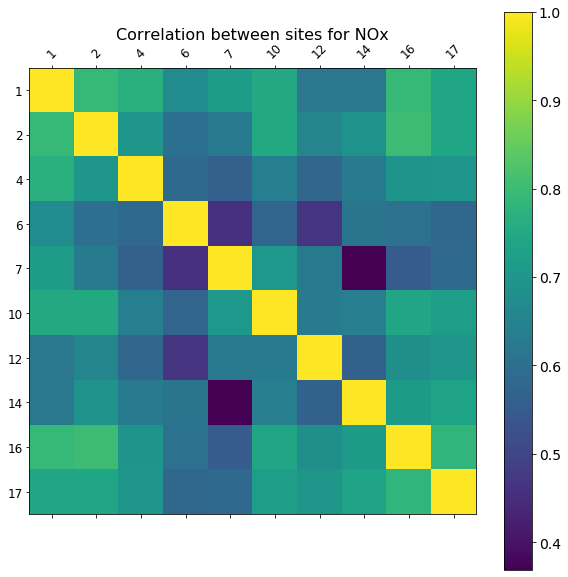

In [151]:
f = plt.figure(figsize=(10, 10))
corr = NOx.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(NOx.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12, rotation=45)
plt.yticks(range(NOx.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NOx', fontsize=16)

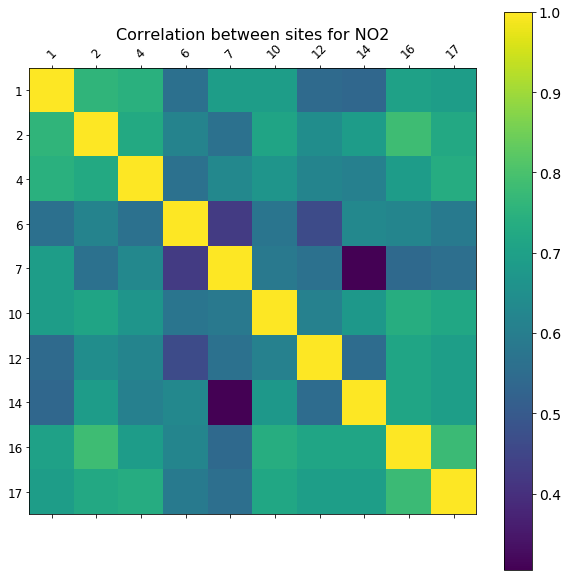

In [146]:
f = plt.figure(figsize=(10, 10))
plt.matshow(NO2.corr(), fignum=f.number)
plt.xticks(range(NO2.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12, rotation=45)
plt.yticks(range(NO2.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NO2', fontsize=16);

Text(0.5, 1.05, 'Correlation between sites for NO')

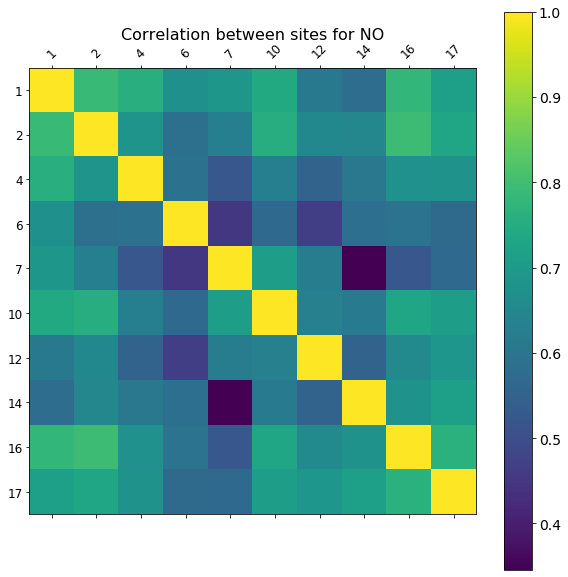

In [152]:
f = plt.figure(figsize=(10, 10))
plt.matshow(NO.corr(), fignum=f.number)
plt.xticks(range(NO.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12, rotation=45)
plt.yticks(range(NO.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NO', fontsize=16)

**[4.7] (4 points) Comment briefly on your observations from Question 4:(f): start by summarising the results from the NO gas and then comment on whether the same is observed
in the other gases or if there is something different.**

Text(0.5, 1.05, 'Correlation between sites for NO')

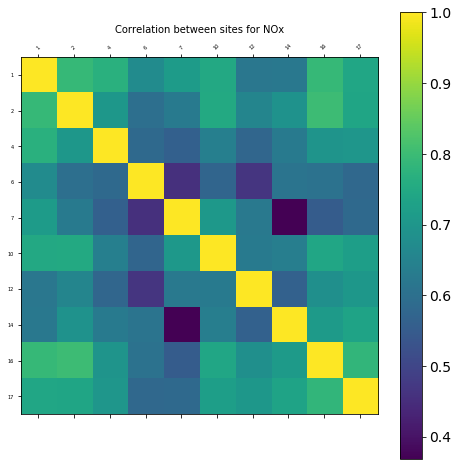

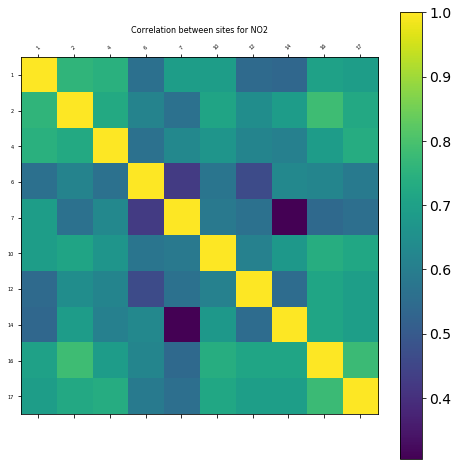

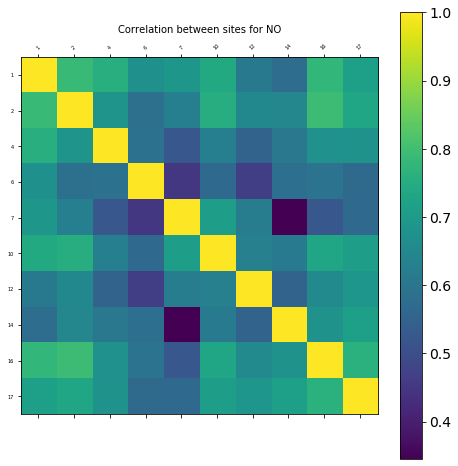

In [164]:

f = plt.figure(figsize=(8, 8))
corr = NOx.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(NOx.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5, rotation=45)
plt.yticks(range(NOx.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NOx', fontsize=10)


f = plt.figure(figsize=(8, 8))
corr = NO2.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(NO2.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5, rotation=45)
plt.yticks(range(NO2.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NO2', fontsize=8)


f = plt.figure(figsize=(8, 8))
corr = NO.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(NO.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5, rotation=45)
plt.yticks(range(NO.shape[1]), [1,2,4,6,7,10,12,14,16,17], fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation between sites for NO', fontsize=10)


## Question 5: (18 points) Principal Component Analysis

One aspect which we have not yet explored is the temporal nature of the data.
That is, we need to keep in mind that the readings have a temporal aspect to
them which can provide some interesting insight. We will explore this next.

We have provided you with a new version of the dataset, BristolAir_DayAligned.csv,
in which the data is organised by daily readings. That is the first two-columns indicate
the SiteID (for which we have selected a reduced subset to make the problem more man-
ageable), and the Date of the readings. The remaining 72 ( 24 × 3 ) columns (numbered
0 through 71) are the 24-hour readings for each of the 'NOx', 'NO2' and 'NO' pollutants
respectively.

Load the data into a pandas dataframe. Remember that the first line is
the header, and that the index columns should be 'SiteID' and 'Date': also, this is again
compressed using 'bz2'. Look at the first few lines and familiarise yourself with the data.

In [280]:
bristol_dayaligned_loc = os.path.join(os.getcwd(), 'Data', 'PartB', 'BristolAir_DayAligned.csv')
bristol_dayaligned = pd.read_csv(bristol_dayaligned_loc, delimiter=',', compression='bz2', header=[0], index_col=[0,1])

In [7]:
bristol_dayaligned

,SiteID,Date,0,1,2,3,4,5,6,7,...,62,63,64,65,66,67,68,69,70,71
0,1,2004-07-02,25.250000,18.000000,12.500000,9.250000,8.750000,14.500000,18.500000,30.750000,...,14.250000,13.750000,12.000000,12.500000,10.750000,10.500000,9.250000,9.000000,7.750000,10.750000
1,1,2004-07-03,22.250000,21.000000,23.500000,33.750000,15.500000,9.000000,14.000000,57.750000,...,12.000000,10.250000,11.000000,14.750000,12.500000,11.500000,5.750000,8.250000,6.250000,1.250000
2,1,2004-07-04,28.250000,22.250000,32.000000,34.500000,50.500000,76.500000,165.750000,170.000000,...,19.250000,29.750000,17.500000,26.500000,18.250000,18.750000,12.500000,14.000000,20.750000,26.000000
3,1,2004-07-05,56.750000,62.500000,79.500000,78.500000,115.750000,149.000000,175.000000,119.000000,...,19.250000,23.500000,12.000000,15.500000,12.500000,13.500000,17.750000,38.000000,39.250000,21.500000
4,1,2004-07-06,94.250000,68.250000,44.500000,47.670000,31.750000,28.250000,31.750000,55.750000,...,3.250000,2.250000,3.000000,2.000000,2.000000,1.000000,0.750000,0.750000,1.000000,0.250000
5,1,2004-07-08,28.250000,25.500000,26.250000,27.250000,29.750000,41.500000,48.000000,53.000000,...,26.500000,26.750000,22.500000,26.000000,23.250000,23.750000,20.500000,13.750000,16.000000,36.750000
6,1,2004-07-09,96.750000,78.750000,60.250000,51.750000,50.000000,55.000000,65.000000,65.750000,...,2.750000,3.000000,3.000000,3.500000,3.500000,1.000000,1.750000,3.750000,3.500000,2.500000
7,1,2004-07-10,48.000000,45.250000,45.500000,47.000000,44.750000,41.500000,39.500000,43.500000,...,4.250000,4.500000,4.250000,1.500000,1.750000,1.750000,1.500000,3.250000,1.500000,1.500000
8,1,2004-07-11,38.000000,38.250000,43.500000,48.000000,49.000000,48.500000,51.500000,64.250000,...,14.000000,20.750000,19.750000,13.750000,16.750000,18.750000,15.500000,13.000000,11.500000,11.250000
9,1,2004-07-12,69.500000,66.250000,62.500000,62.500000,65.250000,74.250000,101.000000,137.250000,...,32.250000,30.250000,26.500000,22.500000,22.500000,19.000000,15.000000,13.000000,12.000000,8.500000


In [297]:
headers = bristol_dayaligned.columns.values
headers

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71'], dtype=object)

In [305]:
bristol_dayaligned.head(5).values[0]

array([25.25, 18.  , 12.5 ,  9.25,  8.75, 14.5 , 18.5 , 30.75, 35.25,
       39.  , 39.75, 32.75, 36.25, 34.75, 42.75, 38.  , 38.25, 29.5 ,
       31.  , 28.5 , 30.  , 30.75, 29.25, 37.25,  9.5 ,  6.25,  5.75,
        5.25,  3.25,  6.25,  7.  ,  9.75,  8.5 , 15.  , 14.25,  8.5 ,
        9.25,  9.75, 13.75, 10.75, 12.75,  7.  ,  9.5 ,  8.25, 10.75,
       11.  , 11.5 , 13.5 ,  7.  ,  5.25,  2.25,  1.25,  2.5 ,  3.  ,
        5.  , 10.25, 14.5 , 10.75, 11.5 , 13.25, 14.25, 12.75, 14.25,
       13.75, 12.  , 12.5 , 10.75, 10.5 ,  9.25,  9.  ,  7.75, 10.75])

**[4.5] (2 points) Plot the first 5 lines of data (plot ecah row as a single line-plot).**

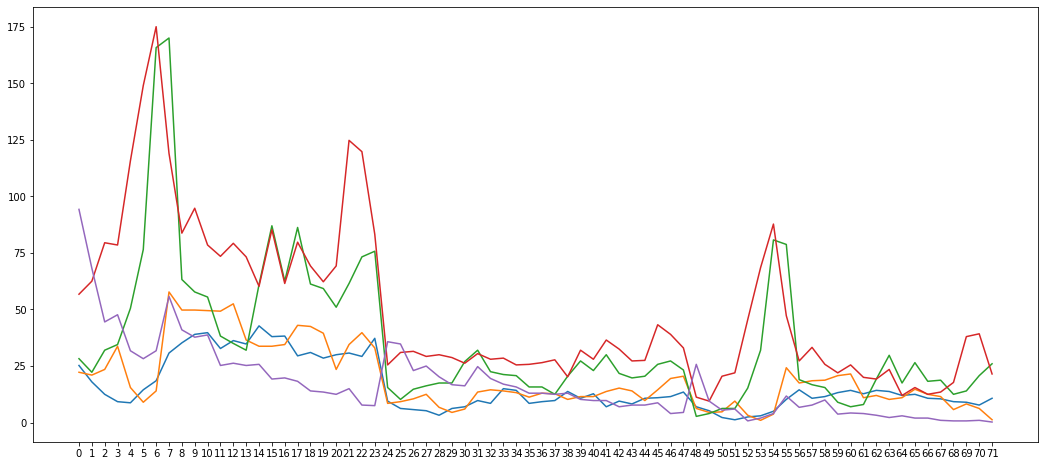

In [320]:
fig = plt.figure(figsize=(18,8))
for i in range(0,5):
    #fig = plt.figure(figsize=(20,20))
    x = headers
    y = bristol_dayaligned.head(5).values[i]
    plt.plot(x,y)
    #plt.figure(figsize=(20,20))

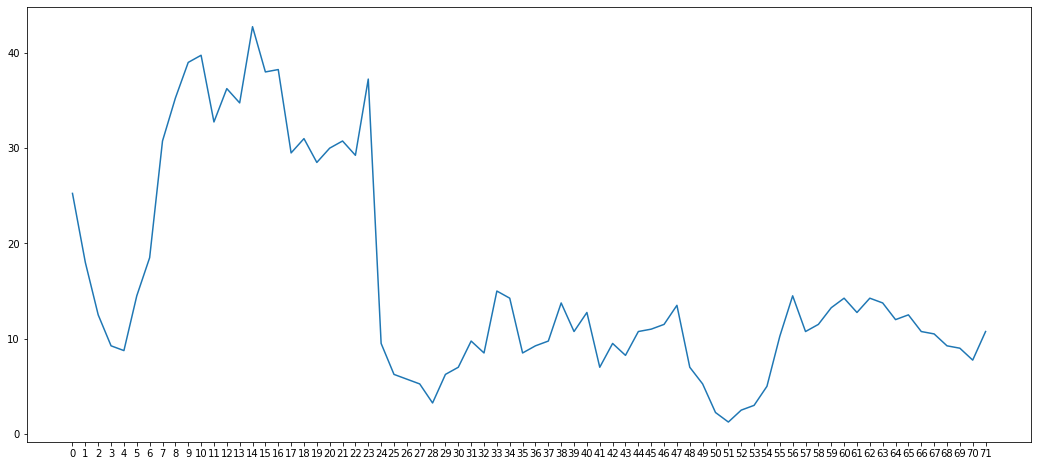

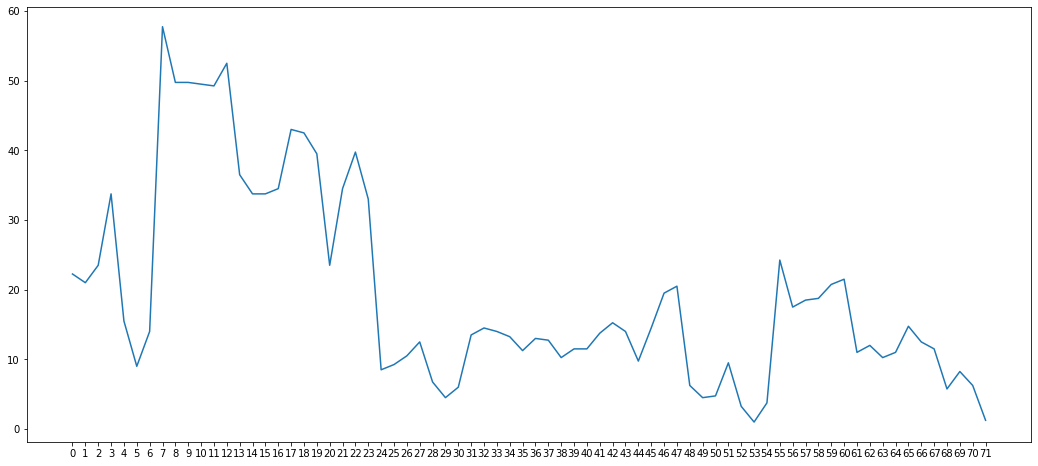

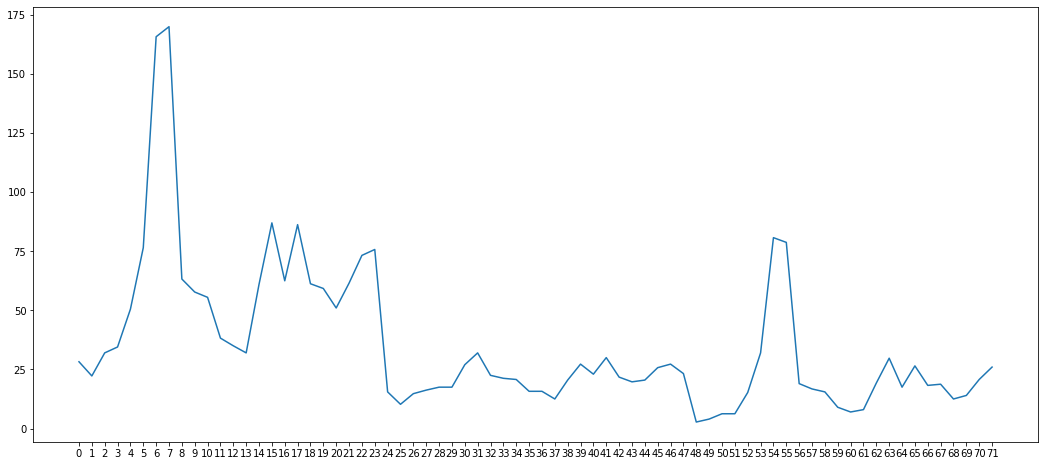

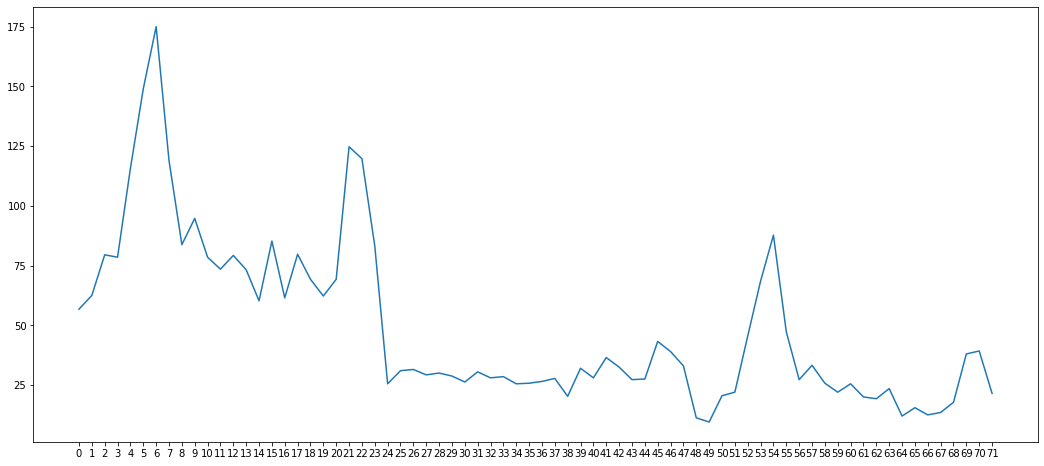

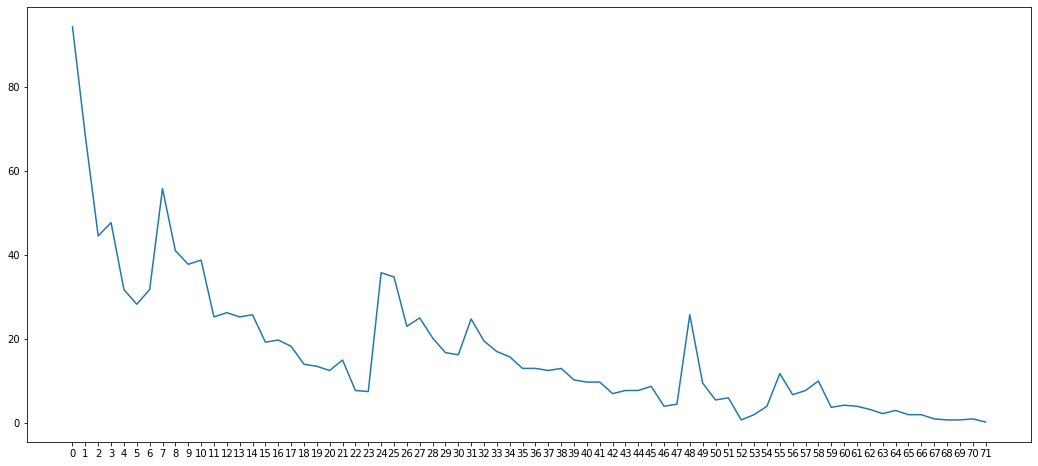

In [321]:
for i in range(0,5):
    fig = plt.figure(figsize=(18,8))
    x = headers
    y = bristol_dayaligned.head(5).values[i]
    plt.plot(x,y)
    #plt.figure(figsize=(20,20))

**You may have noticed that it is very difficult to interpret the data in this manner, especially since there is also a lot of variation between different days. We will address this
by employing Principal Component Analysis (PCA), but in this case, we will do this to
capture the major sources of variability in the data and help us look at it in more detail.
Given that we know about the correlation in the data, we also expect that this will help
in dimensionality reduction.
(b) (5 points) We will focus first on data solely from Site 1. Extract the data from this site,
and run PCA with the number of components set to 72 for now. Set the random_state=0 .
On a single plot plot: (i) the percentage of the variance explained by each principal
component (as a bar-chart), (ii) the cumulative variance (line-plot) explained by the first
n components: ( Hint: you should use twinx() to make the plot fit ), and , (iii) mark the
point (number of components) which collectively explain at least 95% of the variance.
Hint: Number components starting from 1.**


**(b) (5 points) We will focus first on data solely from Site 1. Extract the data from this site, and run PCA with the number of components set to 72 for now. Set the random_state=0 . On a single plot plot: (i) the percentage of the variance explained by each principal component (as a bar-chart), (ii) the cumulative variance (line-plot) explained by the first n components: ( Hint: you should use twinx() to make the plot fit ), and , (iii) mark the point (number of components) which collectively explain at least 95% of the variance. Hint: Number components starting from 1.**

In [339]:
ba = bristol_dayaligned
x = StandardScaler().fit_transform(ba)

pca = PCA(n_components=72)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components)

In [340]:
principal_df

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-6.621297,-0.799553,1.022972,1.309840,1.632243,0.022714,-0.272102,-0.335920,0.163100,-0.210966,...,-0.009834,-0.001654,-0.002764,-5.025807e-03,1.802512e-03,0.001488,-0.000651,4.994532e-03,-0.003716,0.010863
1,-6.206173,-0.527932,1.040861,1.273589,1.356154,-0.139352,-0.288010,-0.255084,0.275180,-0.599272,...,0.013071,-0.000522,-0.004910,-2.399532e-03,3.277527e-03,0.008357,-0.000226,-1.643672e-03,-0.002620,0.000860
2,-4.472426,0.485503,-0.480140,-0.269077,1.728396,0.679255,-0.056597,-0.417063,-0.097193,-0.543317,...,-0.009467,-0.005293,-0.004891,3.543265e-03,-2.569570e-03,0.009143,-0.005454,2.749808e-03,-0.003706,-0.007419
3,-2.650760,2.689617,-0.331399,-0.573055,1.233611,1.146781,-0.062983,0.393045,0.493898,-0.682023,...,0.019074,-0.012585,-0.001886,-6.102772e-03,1.169493e-02,0.007876,-0.007226,4.085811e-03,0.001082,-0.009576
4,-6.035562,1.160541,0.521052,1.529143,0.185989,-0.256485,-1.416316,-0.635540,-0.228444,0.006057,...,-0.005007,-0.009904,-0.005175,-5.756015e-03,-1.172979e-02,0.002745,0.000399,-3.085783e-04,-0.002641,0.000705
5,-4.649194,-0.298108,1.125051,0.063141,0.715354,0.505977,-0.443805,-0.241071,0.437412,-0.535224,...,0.000222,-0.005908,0.006284,-2.880719e-03,4.435439e-04,-0.000152,0.000439,1.163005e-03,-0.001447,0.005827
6,-4.081420,1.343780,0.520246,0.392248,-0.621887,-0.110302,-0.319515,-0.304783,0.110242,-0.196356,...,0.007592,0.001686,-0.011337,-4.193470e-03,-2.576250e-03,0.000520,-0.004371,-3.688264e-03,0.003567,0.001782
7,-4.830776,0.601903,0.421104,0.540808,-0.634091,0.202022,-0.714170,0.013188,0.244523,-0.106196,...,-0.000448,0.000903,-0.000614,4.520828e-03,3.330024e-03,-0.002138,-0.000007,-1.134178e-03,-0.001114,0.002298
8,-4.140144,0.403399,0.487130,0.395984,-0.156518,0.436958,-1.030417,0.064696,0.542402,-0.232966,...,0.000934,-0.005818,0.004899,9.419219e-03,-1.577901e-03,-0.000440,-0.002959,7.595972e-04,-0.000211,-0.004335
9,-3.317310,1.411944,0.012940,0.474157,0.223328,0.339306,-1.433635,-0.276707,0.119819,-0.832220,...,-0.006179,-0.003115,0.000003,-6.543639e-04,2.983767e-04,0.001756,-0.000679,-2.687437e-03,0.000816,-0.000198
